In [1]:
import numpy as np
import matplotlib.pyplot as plt
import upv_audio
from IPython.display import Audio

# Tarea Cross-Fade

## Introducción
El objetivo de la tarea es crear una función que implemente el efecto llamado "cross-fade", que consiste en concatenar dos señales de audio de modo que exista un cierto solape entre las dos señales. En el intervalo de solape, la primera señal irá desapareciendo (*fade-out*) mientras que la segunda señal irá apareciendo (*fade-in*)

## Especificaciones
* La función a realizar recibirá como entrada:
    
    * Dos señales, *x1* y *x2* que son las que se pretende unir. La duración de las mismas será $N1$ y $N2$ respectivamente
    
    * La duración de la transición N. Se cumplirá que:
        
        * $N<N1$
        * $N<N2$

* Se supone que las señales a unir serán ambas stereo.

* La función devolverá una señal de duración $Nout = N1 + N2 - N$




In [2]:
def cross_fade(x1,x2,N):

    # Comprobar que ambas son stereo
    assert x1.ndim==2
    assert x2.ndim==2
    assert x1.shape[1]==2
    assert x2.shape[1]==2
    
    N1=x1.shape[0]
    N2=x2.shape[0]

    assert N1>N
    assert N2>N

    ### BEGIN SOLUTION
    rampin=np.linspace(0.0,1.0,N)
    rampout=np.linspace(1.0,0.0,N)
    
    rampin=np.expand_dims(rampin,1)
    rampout=np.expand_dims(rampout,1)

    ini1=x1[:-N,:]
    fin1=x1[-N:,:]
    ini2=x2[:N,:]
    fin2=x2[N:,:]
    centro=fin1*rampout+ini2*rampin
    out=np.concatenate((ini1,centro,fin2),axis=0)
    return out
    ### END SOLUTION
    

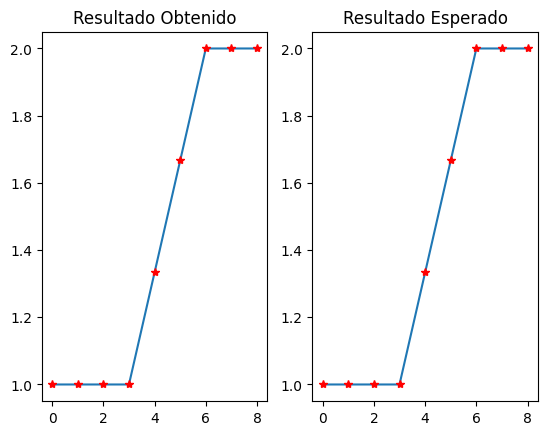

In [3]:
#Celda para verificar si el código es correcto
x1=np.ones((7,2)) # Señal que es todo unos
x2=2*np.ones((6,2)) # Señal que es todo doses
N=4 # Duración de la transicion

out=cross_fade(x1,x2,N) # Llamada a la función

############## Gráficas para comparar #####
_=plt.subplot(121)
_=plt.plot(out[:,0])
_=plt.plot(out[:,0],'*r')
_=plt.title('Resultado Obtenido')

# Cargar y representar el resultado esperado para comparar
_=plt.subplot(122)
esperado=np.load("res_esperado.npy")
_=plt.plot(esperado[:,0])
_=plt.plot(esperado[:,0],'*r')
_=plt.title('Resultado Esperado')

* Revise el código observando especialmente:
    * La cantidad de muestras de la primera señal (valen 1)
    * La cantidad de muestras de la segunda señal (valen 2)
    * El total de muestras
    * Que la duración de la transición incluye tanto la primera como última muestra (N=4 en este ejemplo)

In [4]:
#Celda para verificar si el código es correcto
### BEGIN TESTS
assert out is not None, "Es posible que falte hacer un return"
assert type(out) == type(np.ones(3)), "El resultado debe ser un array de numpy"
assert out.ndim ==2 , "El resultado debe ser un array de numpy bidimensional"
assert out.shape[1]==2, "El resultado debe tener dos columnas"
assert out.shape[0]==(x1.shape[0]+x2.shape[0]-N), "Las dimensiones del resultado no son validas"
assert np.all(np.abs(out-esperado)<1e-7) , "Las dimensiones del resultado son válidas, pero el resultado no es correcto"
### END TESTS

In [5]:
# Celda para evaluar

np.random.seed(2)
x1=np.random.randn(200000,2)
x2=np.cos(2*np.pi*0.02*np.arange(100000))
x2=np.stack((x2,x2),axis=1)
N=27414
out=cross_fade(x1,x2,N)

### BEGIN TESTS
assert out.shape[0]== (x1.shape[0]+x2.shape[0] - N), "Revisar la duración del resultado"
### END TESTS
# TESTS OCULTOS
### BEGIN HIDDEN TESTS

def m_cross_fade(x1,x2,N):

    # Comprobar que ambas son stereo
    assert x1.ndim==2
    assert x2.ndim==2
    assert x1.shape[1]==2
    assert x2.shape[1]==2
    
    N1=x1.shape[0]
    N2=x2.shape[0]

    assert N1>N
    assert N2>N

    rampin=np.linspace(0.0,1.0,N)
    rampout=np.linspace(1.0,0.0,N)
    
    rampin=np.expand_dims(rampin,1)
    rampout=np.expand_dims(rampout,1)

    ini1=x1[:-N,:]
    fin1=x1[-N:,:]
    ini2=x2[:N,:]
    fin2=x2[N:,:]
    centro=fin1*rampout+ini2*rampin
    out=np.concatenate((ini1,centro,fin2),axis=0)
    return out

ref=m_cross_fade(x1,x2,N)
assert out is not None, "Es posible que falte hacer un return"
assert type(out) == type(np.ones(3)), "El resultado debe ser un array de numpy"
assert out.ndim ==2 , "El resultado debe ser un array de numpy bidimensional"
assert out.shape[1]==2, "El resultado debe tener dos columnas"
assert out.shape[0]==(x1.shape[0]+x2.shape[0]-N), "Las dimensiones del resultado no son validas"

assert np.all(np.abs(out-ref)<1e-7),"Las dimensiones son correctas pero no el resultado"

### END HIDDEN TESTS

## Aplicación a señales de audio

Ahora  aplicará la función desarrollada a dos señales de audio contenidas en ficheros, para comprobar auditivamente el efecto

* Cargará dichos archivos como x1 y x2

  * Elegirá los 10 últimos segundos de la señal x1, y lo pondrá en una variable llamada z1
  * Elegirá los 10 primeros segundos de la señal x2 y lo pondrá en una variable llamada z2

* La duración de la transición será **2 segundos**


In [9]:
nombre_fichero_audio1= "audios/elvis.wav"
nombre_fichero_audio2= "audios/she.wav"

fs1,x1=upv_audio.read(nombre_fichero_audio1)
fs2,x2=upv_audio.read(nombre_fichero_audio2)

z1=None # 10 últimos segundos de x1
z2=None # 10 primeros segundos de x2

N=None # Duración en muestras de la transición
### BEGIN SOLUTION
N=int(2*fs1)
N10=int(10*fs1)
z1=x1[-N10:,:]
z2=x2[:N10,:]
N=2*fs1
### END SOLUTION

assert z1 is not None and z2 is not None, "Debe completar z1 y z2"
assert N is not None

In [11]:
# Comprobación de que las señales se han truncado correctamente, z1 y z2 y N está bien

### BEGIN HIDDEN TESTS
M10=int(10*fs1)
assert N==2*fs1, "El valor de N no es correcto"
assert type(x1)==type(z1), "z1 debe ser un array de numpy"
assert type(x2)==type(z2), "z2 debe ser un array de numpy"
assert z1.shape ==(10*fs1,2), "Las dimensiones de z1 no son correctas"
assert z2.shape ==(10*fs1,2), "Las dimensiones de z2 no son correctas"
assert np.allclose(z1,x1[-M10:,:]), "Los valores de z1 no son correctos"
assert np.allclose(z2,x2[:M10,:]), "Los valores de z2 no son correctos"
### END HIDDEN TESTS

In [ ]:
## Escuche el resultado para ver si la transición es correcta
# La transición debe producirse entre el segundo 8 y el segundo 10
resultado=cross_fade(z1,z2,N)

Audio(resultado.T,rate=fs1)
